# Monte Carlo Option Pricing Demo
This notebook demonstrates the pricing of European, Asian, and Barrier options using Monte Carlo simulations in Python. It also includes Greeks calculation and comparison with Black-Scholes formula.

In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from pricing import european_call_mc, european_put_mc, black_scholes_call, black_scholes_put
from exotic_options import asian_call_mc, asian_put_mc, barrier_call_mc
from greeks import delta_mc, gamma_mc, vega_mc, theta_mc, rho_mc
%matplotlib inline

## Parameters

In [3]:
S0 = 100      # initial stock price
K = 100       # strike price
T = 1.0       # time to maturity (1 year)
r = 0.05      # risk-free rate
sigma = 0.2   # volatility
N = 100       # time steps
M = 50000     # number of Monte Carlo simulations
antithetic = True

## European Options Pricing

In [6]:
call_mc = european_call_mc(S0, K, T, r, sigma, N, M, antithetic)
put_mc = european_put_mc(S0, K, T, r, sigma, N, M, antithetic)

call_bs = black_scholes_call(S0, K, T, r, sigma)
put_bs = black_scholes_put(S0, K, T, r, sigma)

print(f"European Call MC: {call_mc:.4f}")
print(f"European Put MC: {put_mc:.4f}")
print(f"European Call BS: {call_bs:.4f}")
print(f"European Put BS: {put_bs:.4f}")

European Call MC: 10.4944
European Put MC: 5.5533
European Call BS: 10.4506
European Put BS: 5.5735


## Exotic Options Pricing

In [10]:
# Asian Options
asian_call = asian_call_mc(S0, K, T, r, sigma, N, M, antithetic)
asian_put = asian_put_mc(S0, K, T, r, sigma, N, M, antithetic)

# Barrier Option (Up-and-Out Call)
B = 120
barrier_call = barrier_call_mc(S0, K, B, T, r, sigma, N, M, antithetic)

print(f"Asian Call MC: {asian_call:.4f}")
print(f"Asian Put MC: {asian_put:.4f}")
print(f"Barrier Up-and-Out Call MC: {barrier_call:.4f}")

Asian Call MC: 5.7684
Asian Put MC: 3.3822
Barrier Up-and-Out Call MC: 1.4162


## Greeks Calculation

In [13]:
delta = delta_mc('call', S0, K, T, r, sigma, N=N, M=M, antithetic=antithetic)
gamma = gamma_mc('call', S0, K, T, r, sigma, N=N, M=M, antithetic=antithetic)
vega = vega_mc('call', S0, K, T, r, sigma, N=N, M=M, antithetic=antithetic)
theta = theta_mc('call', S0, K, T, r, sigma, N=N, M=M, antithetic=antithetic)
rho = rho_mc('call', S0, K, T, r, sigma, N=N, M=M, antithetic=antithetic)

print(f"Delta Call: {delta:.4f}")
print(f"Gamma Call: {gamma:.4f}")
print(f"Vega Call: {vega:.4f}")
print(f"Theta Call: {theta:.4f}")
print(f"Rho Call: {rho:.4f}")

Delta Call: 375.8218
Gamma Call: -15246859.9276
Vega Call: 298.0748
Theta Call: -18.7588
Rho Call: 180.2421


## Monte Carlo Convergence Visualization

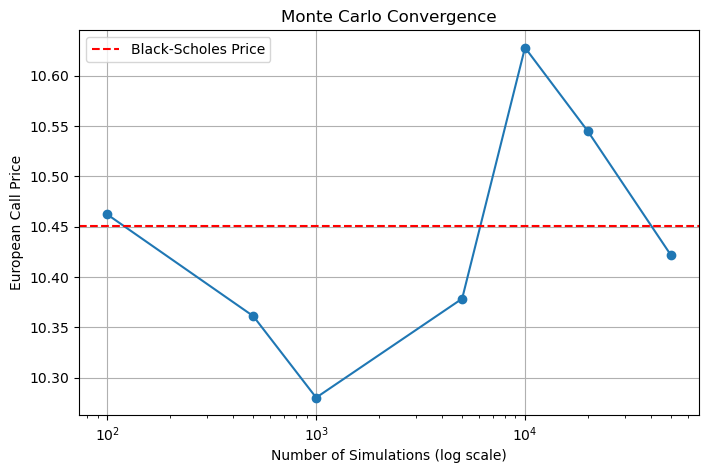

In [15]:
simulations = [100, 500, 1000, 5000, 10000, 20000, 50000]
prices = []

for M_sim in simulations:
    price = european_call_mc(S0, K, T, r, sigma, N, M_sim, antithetic)
    prices.append(price)

plt.figure(figsize=(8,5))
plt.plot(simulations, prices, marker='o')
plt.axhline(call_bs, color='r', linestyle='--', label='Black-Scholes Price')
plt.xscale('log')
plt.xlabel('Number of Simulations (log scale)')
plt.ylabel('European Call Price')
plt.title('Monte Carlo Convergence')
plt.legend()
plt.grid(True)
plt.show()

## Payoff Distribution

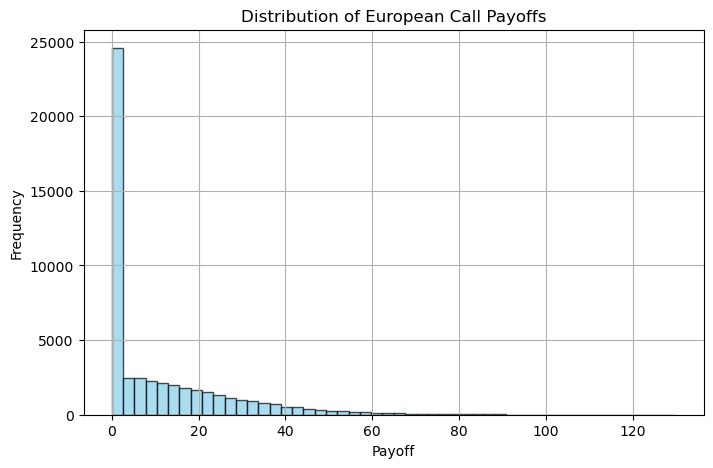

In [19]:
S = european_call_mc.__globals__['simulate_gbm'](S0, T, r, sigma, N, M, antithetic)
payoffs = np.maximum(S[:,-1] - K, 0)

plt.figure(figsize=(8,5))
plt.hist(payoffs, bins=50, alpha=0.7, color='skyblue', edgecolor='black')
plt.xlabel('Payoff')
plt.ylabel('Frequency')
plt.title('Distribution of European Call Payoffs')
plt.grid(True)
plt.show()